<module 'matplotlib.pyplot' from 'C:\\Users\\nguye\\Anaconda3\\envs\\pythonProject\\lib\\site-packages\\matplotlib\\pyplot.py'>

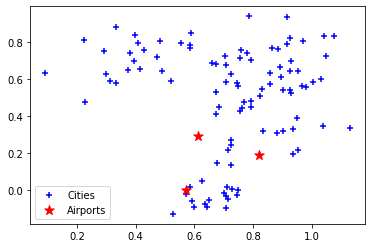

In [334]:
import random
import numpy as np

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y)) 

import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

In [335]:
def distance(airport, city):
    # need distance formula for airport to a city
    return ((airport[0] - city[0])**2 + (airport[1] - city[1])**2)**0.5
    
def calcCitySets(airports, cities):
    # list of size == len(airports)
    # citySets = [[airportCities], [airport2Cities], [airport3Cities]]
    citySets = []
    for i in range(len(airports)):
        citySets.append([])
        
    for city in cities:
        closestAirportIndex = 0
        smallestDist = distance(airports[0], city)
        for i, airport in enumerate(airports[1:]):
            curr = distance(airport, city)
            if curr < smallestDist:
                closestAirportIndex = i + 1
                smallestDist = curr
        citySets[closestAirportIndex].append(city)
    return citySets

def objfunction(airports, citySets):# state
    objVal = 0
    for i, airport in enumerate(airports):
        citySet = citySets[i]
        for city in citySet:
            objVal += (airport[0] - city[0])**2 + (airport[1] - city[1])**2
    return objVal

def calc_grad(airports, citySets):
    # grad = [df/dx1, df/y1, ...]
    grad = []
    for i in range(len(airports)):
        dfdx1 = 0
        dfdy1 = 0
        citySet = citySets[i]
        airport = airports[i]
        for city in citySet:
            dfdx1 += 2 * (airport[0] - city[0])
            dfdy1 += 2 * (airport[1] - city[1])
        grad.append(dfdx1)
        grad.append(dfdy1)
    return grad

# update current state until either (1) # of epochs or (2) % change within threshold

def gradient_descent(airports, cities):
    # flatten airports to 1-D
    state = []
    for pair in airports:
        # append x coords
        state.append(pair[0])
        # append y coords
        state.append(pair[1])
    
    maxEpochs = 40

    # list size 3, len(citySets) == 3
    citySets = calcCitySets(airports, cities)
    
    objValues = []
    objValues.append(objfunction(airports, citySets))
    numOfEpochs = 0
    while numOfEpochs < maxEpochs:
            # updating state:
            # state: [x1, y1, x2, y2, x3, y3]
            # calcGrad return: [df/dx1, df/y1,...]
            airports = []
            for i in range(len(state)):
                if i % 2 == 1:
                    airports.append((state[i - 1], state[i]))
            
            # compute Gradient
            gradVector = calc_grad(airports, citySets)
            # move state
            alpha = .001
            for i in range(len(gradVector)):
                state[i] = state[i] - (alpha *gradVector[i])
            
            # calc new city sets
            airports = []
            for i in range(len(state)):
                if i % 2 == 1:
                    airports.append((state[i - 1], state[i]))
            citySets = calcCitySets(airports, cities)

            # store obj func value
            objValues.append(objfunction(airports, citySets))
            
            
            numOfEpochs += 1
            
    return state, objValues

In [336]:
# plotting
import matplotlib.pyplot as plt

def plot(objValues):
    x = range(len(objValues))
    y = objValues
    plt.scatter(x, y)
    # plt.scatter(objValues)

<module 'matplotlib.pyplot' from 'C:\\Users\\nguye\\Anaconda3\\envs\\pythonProject\\lib\\site-packages\\matplotlib\\pyplot.py'>

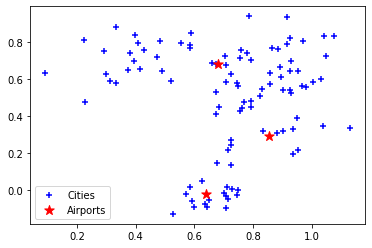

In [337]:
states, objValues = gradient_descent(airports, cities)

airports = []
for i in range(len(states)):
    if i % 2 == 1:
        airports.append((states[i - 1], states[i]))

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

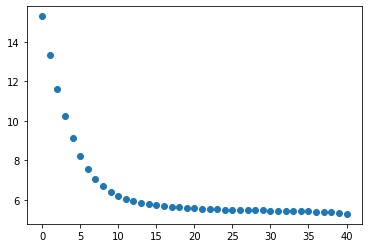

In [338]:
plot(objValues)